<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Splitting the data into Train ,CV and Test sets:

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y, random_state=15)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.25,stratify=y_train, random_state=42)
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)

(3000, 5) (3000,)
(1000, 5) (1000,)
(1000, 5) (1000,)


### Implementing SVC and finding the decision boundary:

In [4]:
model=SVC(gamma=0.001,C=100,kernel='rbf',random_state=15)
model.fit(X_train,y_train)

SVC(C=100, gamma=0.001, random_state=15)

In [5]:
f_cv=model.decision_function(X_cv)
print(f_cv)

[ 1.80695751e+00  1.74878058e+00 -2.79214542e+00 -1.97298263e+00
  5.15429922e-01 -1.66912828e+00  2.70427940e+00 -3.57264780e+00
  1.74853092e+00  1.69490108e+00  1.84770514e+00 -1.76684121e+00
  1.27521004e+00 -2.90892641e+00 -7.14224742e-01 -4.14731562e+00
  4.67040993e-01  1.38753847e+00 -1.60363554e+00 -2.97884988e+00
 -3.67451776e+00 -8.89530860e-01 -2.86929846e+00 -9.16129354e-01
  1.41778659e+00  1.72776123e+00 -2.08462515e+00 -2.17691643e+00
  1.72860604e+00  2.21212969e+00 -3.10565637e+00 -2.14039812e+00
 -3.86256365e+00 -3.67452455e+00  8.46438676e-01 -8.45657034e-01
  9.09252205e-01  1.46856799e+00  1.64431643e+00  9.57008630e-01
  1.63135573e+00  1.34595199e+00 -2.17672082e+00 -1.44959809e+00
 -2.55185733e+00 -3.06075772e+00 -3.92572914e+00 -9.83550442e-01
  1.47684491e+00 -2.01481131e+00 -1.35710848e+00  2.22817539e+00
 -1.38113935e+00 -3.23984732e+00 -4.07098022e+00 -2.38985160e+00
 -2.82074476e+00  2.33558494e+00 -2.80342975e+00 -3.29997660e+00
 -7.03276367e-01 -2.60356

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [6]:
# you can write your code here
def decision_function(X_cv):
    alpha=model.dual_coef_[0]   
    decision_boundary=[]
    for Xq in X_cv:
        sum1 = model.intercept_[0]
        for i,sup_vec in enumerate(model.support_vectors_):
            norm = np.linalg.norm(sup_vec - Xq)**2
            rbf = np.exp(-0.001*norm)
            sum1 += (alpha[i]*rbf)
        decision_boundary.append(sum1)
    return np.array(decision_boundary)

In [7]:
f_cv=decision_function(X_cv)
f_cv

array([ 1.80695751e+00,  1.74878058e+00, -2.79214542e+00, -1.97298263e+00,
        5.15429922e-01, -1.66912828e+00,  2.70427940e+00, -3.57264780e+00,
        1.74853092e+00,  1.69490108e+00,  1.84770514e+00, -1.76684121e+00,
        1.27521004e+00, -2.90892641e+00, -7.14224742e-01, -4.14731562e+00,
        4.67040993e-01,  1.38753847e+00, -1.60363554e+00, -2.97884988e+00,
       -3.67451776e+00, -8.89530860e-01, -2.86929846e+00, -9.16129354e-01,
        1.41778659e+00,  1.72776123e+00, -2.08462515e+00, -2.17691643e+00,
        1.72860604e+00,  2.21212969e+00, -3.10565637e+00, -2.14039812e+00,
       -3.86256365e+00, -3.67452455e+00,  8.46438676e-01, -8.45657034e-01,
        9.09252205e-01,  1.46856799e+00,  1.64431643e+00,  9.57008630e-01,
        1.63135573e+00,  1.34595199e+00, -2.17672082e+00, -1.44959809e+00,
       -2.55185733e+00, -3.06075772e+00, -3.92572914e+00, -9.83550442e-01,
        1.47684491e+00, -2.01481131e+00, -1.35710848e+00,  2.22817539e+00,
       -1.38113935e+00, -

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [8]:
# Storing all the positive examples and negative examples in separate lists
N_p=[]
N_n=[]
for i in y_train:
    if i==1:
        N_p.append(i)
    else:
        N_n.append(i)
print(len(N_p)) 
print(len(N_n))

908
2092


In [9]:
N_p = len(N_p)
N_n = len(N_n)

In [10]:
# Since Platt calibration uses y+ and y- ,hence we calculate y+ and y- 
y_pos= (N_p+1)/(N_p+2)
print(y_pos)
y_neg= 1/(N_n+2)
print(y_neg)

0.9989010989010989
0.0004775549188156638


In [11]:
# replace the values of 1,0 in y_cv dataset with y+ and y- 
y_cv_new=[]
for i in y_cv:
    if i==1:
        y_cv_new.append(y_pos)
    elif i!=1:
        y_cv_new.append(y_neg)
y_cv_new

[0.9989010989010989,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.9989010989010989,
 0.9989010989010989,
 0.9989010989010989,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.9989010989010989,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004775549188156638,
 0.9989010989010989,
 0.9989010989010989,
 0.9989010989010989,
 0.9989010989010989,
 0.9989010989010989,
 0.0004775549188156638,
 0.0004775549188156638,
 0.0004

### Applying Logistic Regression with SGD and L2 regularization on the newly created dataset:

In [12]:
from tqdm import tqdm
import math
from math import log

def initialize_weights(dim):
    dim = X_train[0] 
    w = np.zeros((1,))
    b = 0
   
    return w,b

dim = X_train[0] 
w,b = initialize_weights(dim)


def sigmoid(z):

    return 1. / (1 + np. exp(-z))

def logloss(y_true,y_pred):
    
    loss = -sum(map(lambda y_true, y_pred: y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred), y_true, y_pred))/len(y_true)

    return loss

def gradient_dw(x,y,w,b,alpha,N):

    dw = x * (y - sigmoid(np.dot(w, x) + b)) - (alpha / N) * w

    return dw

def gradient_db(x,y,w,b):
    
    db = y - sigmoid(np.dot(w, x) + b)

    return db

log_loss=[]
epoch_list = []
def train(X_train,y_train):

    w,b = initialize_weights(X_train[0])
    eta0 = 0.0001
    
    for e in tqdm(range(epochs)):
        y_tr_pred=[]
        y_ts_pred=[]
        for i in range(len(X_train)):
            
            w = w + (eta0 * gradient_dw(X_train[i], y_train[i], w, b, alpha, N))
            b = b + (eta0 * gradient_db(X_train[i], y_train[i], w, b))

        for k in range(len(X_train)):
            z = np.dot(w,X_train[k])+b
            s = sigmoid(z)
            y_tr_pred.append(s)
        l_tr = logloss(y_train,y_tr_pred)
        log_loss.append(l_tr)


        epoch_list.append(e)
        
    return w,b


In [13]:
alpha=0.0001
eta0=0.0001
N=len(f_cv)
epochs=50
w,b=train(f_cv,y_cv_new)

100%|██████████████████████████████████████████| 50/50 [00:03<00:00, 15.39it/s]


In [14]:
print('weights:',w)

weights: [1.17043809]


In [15]:
print('Intercept:',b)

Intercept: [-0.16813985]


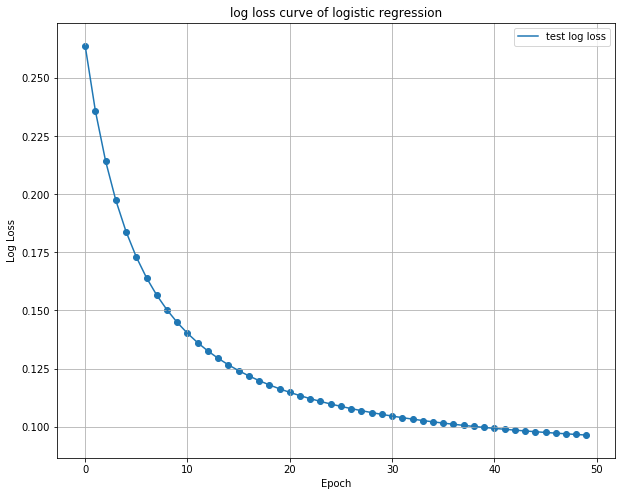

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(epoch_list,log_loss,label='test log loss')
plt.scatter(epoch_list,log_loss)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('log loss curve of logistic regression')
plt.legend()

#### Probability of Y==1| X :

In [18]:
f_test=model.decision_function(X_test)

P = 1/(1 + np.exp(-((w*f_test)+b)))
P

array([0.61373282, 0.083824  , 0.01026194, 0.0201278 , 0.04300734,
       0.13706624, 0.10753921, 0.04128707, 0.82334818, 0.8796553 ,
       0.0879715 , 0.67130637, 0.02507694, 0.54946646, 0.10150171,
       0.05403434, 0.02919601, 0.97026782, 0.32575782, 0.05527751,
       0.14294209, 0.61305754, 0.81932576, 0.01106932, 0.10336141,
       0.75960892, 0.82176401, 0.05428534, 0.89327014, 0.77588384,
       0.10843147, 0.20112698, 0.07699283, 0.00850466, 0.93553815,
       0.00119108, 0.64234382, 0.92265084, 0.12503242, 0.87561775,
       0.02077811, 0.00343432, 0.03339706, 0.00710464, 0.84622414,
       0.01406702, 0.01840955, 0.86314   , 0.53493003, 0.00753556,
       0.02067913, 0.17947669, 0.00534215, 0.10594477, 0.17322029,
       0.04563505, 0.64505748, 0.05236154, 0.0998101 , 0.87926039,
       0.02477943, 0.07123137, 0.05760188, 0.02711193, 0.73650827,
       0.06118594, 0.04442075, 0.26051224, 0.0114734 , 0.05294436,
       0.80644912, 0.01737472, 0.07051795, 0.4543958 , 0.88691